<a href="https://colab.research.google.com/github/benjaminutter/IDS/blob/Project5/Project5P.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# url of csv
data_url = "https://raw.githubusercontent.com/bforoura/IDS/main/HW5/wine_flag_all.csv"

# put into df
df = pd.read_csv(data_url)

Checking for missing values:

In [3]:
# count missing values
missing_count = df.isnull().sum()
print(missing_count)


Type            0
Alcohol_flag    0
Sugar_flag      0
dtype: int64


Encoding all categoric attributes:

In [4]:
# check the data types
print(df.dtypes)

# encode categorical attributes
df_encoded = pd.get_dummies(df)

# show first few rows
print(df_encoded.head())

Type            object
Alcohol_flag    object
Sugar_flag      object
dtype: object
   Type_Red  Type_White  Alcohol_flag_High  Alcohol_flag_Low  Sugar_flag_High  \
0         1           0                  1                 0                1   
1         1           0                  1                 0                0   
2         1           0                  0                 1                1   
3         1           0                  1                 0                0   
4         1           0                  0                 1                0   

   Sugar_flag_Low  
0               0  
1               1  
2               0  
3               1  
4               1  


Type vs. Alcohol Content contingency table:

In [5]:
# contingency table  Type vs. alcohol
alc_ct = pd.crosstab(df['Type'], df['Alcohol_flag'])
print("Contingency Table for Type vs. Alcohol Content:")
print(alc_ct)

Contingency Table for Type vs. Alcohol Content:
Alcohol_flag  High   Low
Type                    
Red            485   600
White         1176  1084


Type vs. Sugar Content contingency table:

In [6]:
# contingency table Type vs. Sugar
sugar_ct = pd.crosstab(df['Type'], df['Sugar_flag'])
print("\nContingency Table for Type vs. Sugar Content:")
print(sugar_ct)


Contingency Table for Type vs. Sugar Content:
Sugar_flag  High  Low
Type                 
Red          237  848
White       1382  878


Plotting the two cross tabulations:

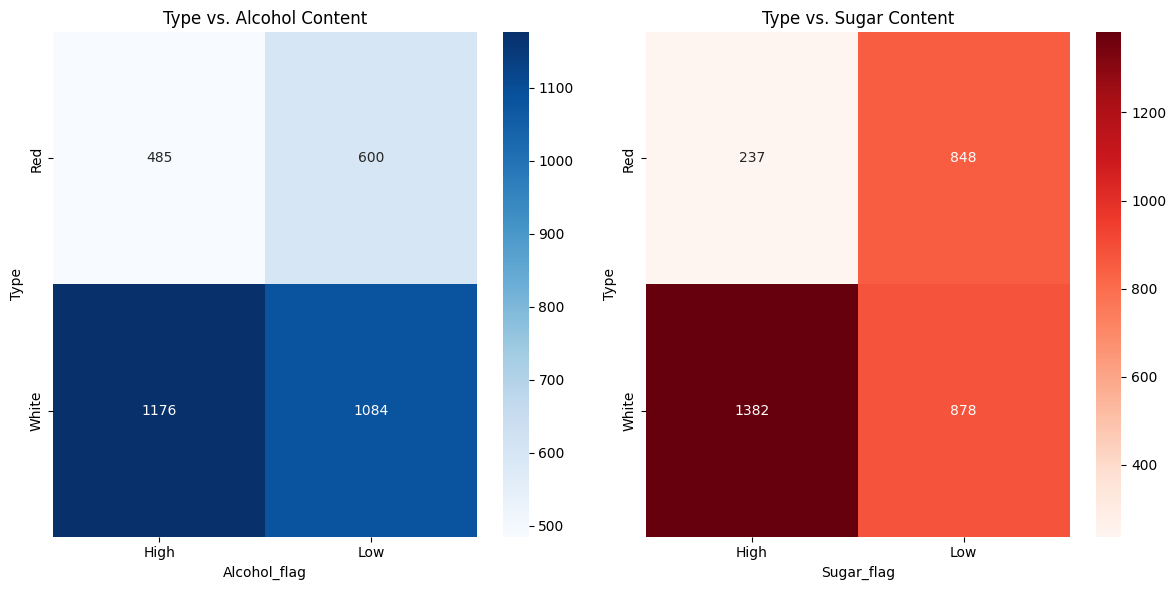

In [7]:
import seaborn as sns

# Plot the cross-tabulations
plt.figure(figsize=(12, 6))

# a. Type vs. Alcohol content
plt.subplot(1, 2, 1)
sns.heatmap(alc_ct, annot=True, fmt="d", cmap="Blues", cbar=True)
plt.title('Type vs. Alcohol Content')

# b. Type vs. Sugar content
plt.subplot(1, 2, 2)
sns.heatmap(sugar_ct, annot=True, fmt="d", cmap="Reds", cbar=True)
plt.title('Type vs. Sugar Content')

plt.tight_layout()
plt.show()

Question #7:

In [8]:
# a. prior probability of Type = Red and Type = White
total_samples = len(df)
prior_red = len(df[df['Type'] == 'Red']) / total_samples
prior_white = len(df[df['Type'] == 'White']) / total_samples

print("a. Prior probability of Type = Red:", prior_red)
print("   Prior probability of Type = White:", prior_white)

# b. probability of high and low alcohol content
alc_high = alc_ct['High'].sum()
alc_low = alc_ct['Low'].sum()

prob_alc_high = alc_high / total_samples
prob_alc_low = alc_low / total_samples

print("\nb. Probability of High Alcohol Content:", prob_alc_high)
print("   Probability of Low Alcohol Content:", prob_alc_low)

# c. probability of high and low sugar content
sugar_high = sugar_ct['High'].sum()
sugar_low = sugar_ct['Low'].sum()
prob_sugar_high = sugar_high / total_samples
prob_sugar_low = sugar_low / total_samples

print("\nc. Probability of High Sugar Content:", prob_sugar_high)
print("   Probability of Low Sugar Content:", prob_sugar_low)

# d. conditional probabilities p(Alcohol_flag = High ∣ Type = Red) and p(Alcohol_flag = Low ∣ Type = Red)
con_prob_alc_h_red = alc_ct.loc['Red', 'High'] / total_samples
con_prob_alc_l_red = alc_ct.loc['Red', 'Low'] / total_samples

print("\nd. Conditional probability of High Alcohol Content given Type = Red:", con_prob_alc_h_red)
print("   Conditional probability of Low Alcohol Content given Type = Red:", con_prob_alc_l_red)

# e. Conditional probabilities p(Sugar_flag = High ∣ Type = Red) and p(Sugar_flag = Low ∣ Type = Red)
con_prob_sugar_h_red = sugar_ct.loc['Red', 'High'] / total_samples
con_prob_sugar_l_red = sugar_ct.loc['Red', 'Low'] / total_samples

print("\ne. Conditional probability of High Sugar Content given Type = Red:", con_prob_sugar_h_red)
print("   Conditional probability of Low Sugar Content given Type = Red:", con_prob_sugar_l_red)


a. Prior probability of Type = Red: 0.3243647234678625
   Prior probability of Type = White: 0.6756352765321375

b. Probability of High Alcohol Content: 0.49656203288490286
   Probability of Low Alcohol Content: 0.5034379671150971

c. Probability of High Sugar Content: 0.48400597907324366
   Probability of Low Sugar Content: 0.5159940209267564

d. Conditional probability of High Alcohol Content given Type = Red: 0.14499252615844543
   Conditional probability of Low Alcohol Content given Type = Red: 0.17937219730941703

e. Conditional probability of High Sugar Content given Type = Red: 0.07085201793721974
   Conditional probability of Low Sugar Content given Type = Red: 0.25351270553064276


Creating NB classifiers and finding their accuracy and then plotting them:


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Test Ratio: 20%
Accuracy: 0.7205
---------
Test Ratio: 25%
Accuracy: 0.7228
---------
Test Ratio: 30%
Accuracy: 0.7261
---------
Test Ratio: 40%
Accuracy: 0.7242
---------
Test Ratio: 50%
Accuracy: 0.7280
---------


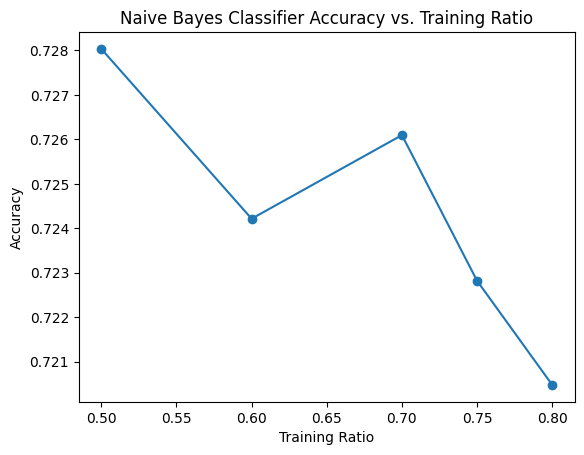

In [31]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt

# getting type
X = df.drop(columns=['Type'])  # features
y = df['Type']  # target variable

# encoding categorical variables
encoder = OneHotEncoder(drop='first', sparse=False)
X_encoded = encoder.fit_transform(X[['Alcohol_flag', 'Sugar_flag']])
columns_encoded = encoder.get_feature_names_out(['Alcohol_flag', 'Sugar_flag'])

# concat encoded columns
X_encoded_df = pd.DataFrame(X_encoded, columns=columns_encoded)
X = pd.concat([X.drop(columns=['Alcohol_flag', 'Sugar_flag']), X_encoded_df], axis=1)

# NB clsssifier
nb_classifier = GaussianNB()

# test ratios and getting accuracies
test_ratios = [0.2, 0.25, 0.3, 0.4, 0.5]
train_ratios = [1 - ratio for ratio in test_ratios]
accuracies = []

# getting accuracies for different ratios
for ratio in test_ratios:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=ratio, random_state=42, stratify=y, shuffle=True)

    # NB classifier on train
    nb_classifier.fit(X_train, y_train)

    # predictions
    y_pred = nb_classifier.predict(X_test)

    # find accuracy
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

    print(f"Test Ratio: {int(ratio*100)}%")
    print(f"Accuracy: {accuracy:.4f}")
    print("---------")

# plotting accuracies
plt.plot(train_ratios, accuracies, marker='o')
plt.xlabel('Training Ratio')
plt.ylabel('Accuracy')
plt.title('Naive Bayes Classifier Accuracy vs. Training Ratio')
plt.show()
